In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime

In [2]:
concat_df = pd.read_csv('./prepped_data/메인_데이터_20060101_20210409.csv')
print(concat_df.shape)
concat_df.head()

(2060580, 11)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,11500.0,-1,1992.0,14.0,2006-08-29,NaN,연립다세대
1,서울특별시 강남구 개포동 171-13,선릉로14길 11-0,(171-13),68.08,56500.0,2,1988.0,18.0,2006-12-20,NaN,연립다세대
2,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,40500.0,2,1988.0,18.0,2006-12-09,NaN,연립다세대
3,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,42000.0,1,1988.0,18.0,2006-12-19,NaN,연립다세대
4,서울특별시 강남구 개포동 1239-6,개포로15길 27-0,강남빌라 나동,52.75,22000.0,2,1988.0,18.0,2006-11-02,NaN,연립다세대


In [3]:
concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'])

In [4]:
concat_df['층'].dtype

dtype('int64')

In [5]:
concat_df['층'] = concat_df['층'].astype(int)

In [6]:
zero_df = concat_df[concat_df['층'] == 0]
print(zero_df.shape)
zero_df.head()

(0, 11)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형


In [7]:
concat_df.isna().sum()

지번주소               543
도로명                  0
건물(단지)명              3
전용면적(㎡)              0
거래금액(만원)             0
층                    0
건축년도              1540
계약날짜기준_건물연식       1540
계약날짜                 0
해제사유발생일        2053003
부동산유형                0
dtype: int64

In [8]:
nan_df = concat_df[concat_df['지번주소'].isna()]
print(nan_df.shape)
nan_df.head()

(543, 11)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형
25079,NaN,상계로33길 6-5,금정빌라,64.37,13200.0,3,1995.0,11.0,2006-09-14,NaN,연립다세대
25292,NaN,덕릉로124가길 13-12,신아빌리지2차가동,49.89,12200.0,2,1990.0,16.0,2006-06-20,NaN,연립다세대
25293,NaN,덕릉로124가길 13-4,신아빌리지2차라동,48.30,9800.0,2,1990.0,16.0,2006-05-10,NaN,연립다세대
32931,NaN,-0,공덕동주택,18.90,11000.0,-1,1990.0,16.0,2006-04-05,NaN,연립다세대
32932,NaN,-0,공덕동주택,15.66,9300.0,-1,1990.0,16.0,2006-09-20,NaN,연립다세대


In [9]:
nan_df['도로명'].iloc[4]

' -0'

In [10]:
nan_df['도로명'].iloc[4] == ' -0'

True

In [11]:
doro_nan_df = concat_df[concat_df['도로명'] == ' -0']
print(doro_nan_df.shape)
doro_nan_df.head()

(7651, 11)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형
4964,서울특별시 강북구 미아동 163-20,-0,장안맨숀,84.84,19000.0,1,1982.0,24.0,2006-11-05,NaN,연립다세대
9043,서울특별시 강서구 염창동 244-14,-0,(244-14),40.91,14000.0,1,1977.0,29.0,2006-10-30,NaN,연립다세대
9083,서울특별시 강서구 염창동 244-18,-0,동아,40.89,10300.0,2,1977.0,29.0,2006-08-25,NaN,연립다세대
9084,서울특별시 강서구 염창동 244-18,-0,동아,40.89,13500.0,1,1977.0,29.0,2006-10-26,NaN,연립다세대
21151,서울특별시 구로구 개봉동 367-16,-0,(367-16),76.03,7550.0,1,1982.0,24.0,2006-03-28,NaN,연립다세대


In [12]:
concat_df.loc[doro_nan_df.index, '도로명'] = np.nan

In [13]:
jibun_none_df = concat_df[(concat_df['지번주소'] == ' -0')|(concat_df['지번주소'] == ' ')|(concat_df['지번주소'] == '')
                          |(concat_df['지번주소'] == '-0')
                         ]
print(jibun_none_df.shape)
jibun_none_df.head()

(0, 11)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형


In [14]:
both_nan_df = concat_df[(concat_df['지번주소'].isna())&(concat_df['도로명'].isna())]
print(both_nan_df.shape)
both_nan_df.head()

(152, 11)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형
32931,NaN,NaN,공덕동주택,18.90,11000.0,-1,1990.0,16.0,2006-04-05,NaN,연립다세대
32932,NaN,NaN,공덕동주택,15.66,9300.0,-1,1990.0,16.0,2006-09-20,NaN,연립다세대
32933,NaN,NaN,공덕동주택,18.90,12500.0,-1,1990.0,16.0,2006-12-04,NaN,연립다세대
148855,NaN,NaN,공덕동주택,60.11,20500.0,3,2004.0,4.0,2008-03-05,NaN,연립다세대
148856,NaN,NaN,공덕동주택,16.50,16956.0,2,1990.0,18.0,2008-03-24,NaN,연립다세대


In [15]:
concat_df = concat_df.drop(both_nan_df.index).reset_index(drop=True)
print(concat_df.shape)

(2060428, 11)


In [16]:
concat_df.isna().sum()

지번주소               391
도로명               7499
건물(단지)명              3
전용면적(㎡)              0
거래금액(만원)             0
층                    0
건축년도              1526
계약날짜기준_건물연식       1526
계약날짜                 0
해제사유발생일        2052852
부동산유형                0
dtype: int64

In [40]:
def house_area_into_classes(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(100):
            if x <= ((i+1)*5):
                return '{}~{}'.format((i*5), (i+1)*5)
        return '500초과'

In [41]:
concat_df['전용면적_classes'] = concat_df['전용면적(㎡)'].apply(house_area_into_classes)

In [42]:
concat_df.head()

,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형,전용면적_classes,가격_면적,가격_면적_classes
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,11500.0,-1,1992.0,14.0,2006-08-29,NaN,연립다세대,50~55,215.840841,220이하
1,서울특별시 강남구 개포동 171-13,선릉로14길 11-0,(171-13),68.08,56500.0,2,1988.0,18.0,2006-12-20,NaN,연립다세대,65~70,829.905993,830이하
2,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,40500.0,2,1988.0,18.0,2006-12-09,NaN,연립다세대,50~55,770.108386,780이하
3,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,42000.0,1,1988.0,18.0,2006-12-19,NaN,연립다세대,50~55,798.630918,800이하
4,서울특별시 강남구 개포동 1239-6,개포로15길 27-0,강남빌라 나동,52.75,22000.0,2,1988.0,18.0,2006-11-02,NaN,연립다세대,50~55,417.061611,420이하


In [43]:
concat_df['전용면적_classes'].value_counts()

80~85      420639
55~60      354034
45~50      136241
35~40      130892
40~45      129413
50~55      112784
25~30       92103
30~35       86083
60~65       77102
65~70       65537
70~75       65215
75~80       59411
110~115     54277
20~25       41702
15~20       33383
100~105     20326
115~120     17698
130~135     16799
10~15       16693
95~100      16340
105~110     15841
120~125     13598
85~90       11640
125~130     11527
90~95        9794
135~140      7168
140~145      6272
145~150      6216
160~165      5227
150~155      4399
155~160      3964
165~170      3231
170~175      1926
240~245      1714
175~180      1702
180~185      1260
195~200      1091
185~190      1046
190~195       869
205~210       829
215~220       748
200~205       699
210~215       563
220~225       499
235~240       465
230~235       458
225~230       403
245~250       112
250~255        97
270~275        97
5~10           66
255~260        63
265~270        39
260~265        35
280~285        20
295~300   

In [44]:
concat_df['가격_면적'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']

In [45]:
concat_df.head()

,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형,전용면적_classes,가격_면적,가격_면적_classes
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,11500.0,-1,1992.0,14.0,2006-08-29,NaN,연립다세대,50~55,215.840841,220이하
1,서울특별시 강남구 개포동 171-13,선릉로14길 11-0,(171-13),68.08,56500.0,2,1988.0,18.0,2006-12-20,NaN,연립다세대,65~70,829.905993,830이하
2,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,40500.0,2,1988.0,18.0,2006-12-09,NaN,연립다세대,50~55,770.108386,780이하
3,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,42000.0,1,1988.0,18.0,2006-12-19,NaN,연립다세대,50~55,798.630918,800이하
4,서울특별시 강남구 개포동 1239-6,개포로15길 27-0,강남빌라 나동,52.75,22000.0,2,1988.0,18.0,2006-11-02,NaN,연립다세대,50~55,417.061611,420이하


<AxesSubplot:>

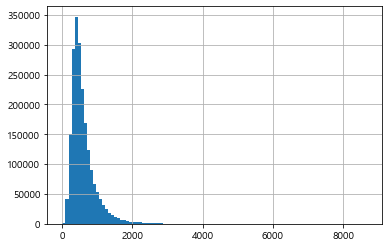

In [52]:
concat_df['가격_면적'].hist(bins=100)

In [61]:
upper_df = concat_df[concat_df['가격_면적'] > 3000]
print(upper_df.shape)

(2469, 14)


<AxesSubplot:>

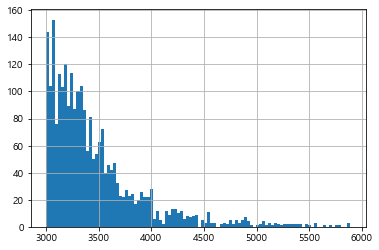

In [62]:
upper_df['가격_면적'].hist(bins=100)

In [63]:
concat_df = concat_df[concat_df['가격_면적'] <= 4500]
print(concat_df.shape)
concat_df.head()

(2060316, 14)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형,전용면적_classes,가격_면적,가격_면적_classes
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,11500.0,-1,1992.0,14.0,2006-08-29,NaN,연립다세대,50~55,215.840841,210~220
1,서울특별시 강남구 개포동 171-13,선릉로14길 11-0,(171-13),68.08,56500.0,2,1988.0,18.0,2006-12-20,NaN,연립다세대,65~70,829.905993,820~830
2,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,40500.0,2,1988.0,18.0,2006-12-09,NaN,연립다세대,50~55,770.108386,770~780
3,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,42000.0,1,1988.0,18.0,2006-12-19,NaN,연립다세대,50~55,798.630918,790~800
4,서울특별시 강남구 개포동 1239-6,개포로15길 27-0,강남빌라 나동,52.75,22000.0,2,1988.0,18.0,2006-11-02,NaN,연립다세대,50~55,417.061611,410~420


<AxesSubplot:>

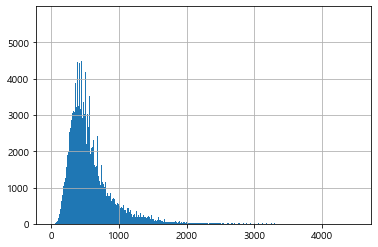

In [64]:
concat_df['가격_면적'].hist(bins=5000)

In [65]:
def price_over_area_feature_engi(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(1000):
            if x < ((i+1)*10):
                return '{}~{}'.format((i*10), (i+1)*10)
        
        return '10000초과'

In [66]:
concat_df['가격_면적_classes'] = concat_df['가격_면적'].apply(price_over_area_feature_engi)

In [67]:
concat_df.head()

,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,해제사유발생일,부동산유형,전용면적_classes,가격_면적,가격_면적_classes
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,11500.0,-1,1992.0,14.0,2006-08-29,NaN,연립다세대,50~55,215.840841,210~220
1,서울특별시 강남구 개포동 171-13,선릉로14길 11-0,(171-13),68.08,56500.0,2,1988.0,18.0,2006-12-20,NaN,연립다세대,65~70,829.905993,820~830
2,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,40500.0,2,1988.0,18.0,2006-12-09,NaN,연립다세대,50~55,770.108386,770~780
3,서울특별시 강남구 개포동 1239-7,개포로15길 25-0,강남빌라 가동,52.59,42000.0,1,1988.0,18.0,2006-12-19,NaN,연립다세대,50~55,798.630918,790~800
4,서울특별시 강남구 개포동 1239-6,개포로15길 27-0,강남빌라 나동,52.75,22000.0,2,1988.0,18.0,2006-11-02,NaN,연립다세대,50~55,417.061611,410~420


In [68]:
concat_df['가격_면적_classes'].nunique()

440

In [69]:
concat_df['가격_면적_classes'].value_counts()

410~420      42001
400~410      41422
370~380      40760
380~390      40724
350~360      40134
360~370      39265
430~440      39264
420~430      38111
340~350      37927
390~400      37782
440~450      37655
450~460      37100
330~340      37030
470~480      36785
500~510      36125
320~330      36005
310~320      35730
460~470      35521
300~310      35403
480~490      34362
290~300      32507
490~500      32394
510~520      31621
520~530      30502
280~290      30443
530~540      29183
270~280      27758
580~590      27580
550~560      27377
540~550      27227
560~570      26281
260~270      26087
570~580      24220
600~610      23953
250~260      23492
610~620      23026
590~600      21899
700~710      21793
620~630      21638
240~250      21465
630~640      20869
640~650      20190
650~660      19388
230~240      19277
660~670      18065
680~690      17403
220~230      17238
670~680      17057
210~220      16161
690~700      16134
200~210      14396
710~720      14304
740~750     

In [70]:
concat_df.to_csv('./prepped_data/메인_데이터_20060101_20210409_ver_2.csv', index=False)